**FCN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

## Build FCN Model and display summary

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os, random, pprint
sys.path.append('../..')
import tensorflow as tf
import keras.backend as KB
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import mrcnn.visualize as visualize
import mrcnn.utils as utils
from mrcnn.datagen         import data_generator, load_image_gt, data_gen_simulate
from mrcnn.utils           import mask_string, parse_image_meta, apply_box_deltas_tf
from mrcnn.prep_notebook   import build_newshapes_config, build_coco_config
from mrcnn.coco            import prep_coco_dataset, CocoConfig ## CocoDataset, CocoConfig, CocoInferenceConfig, evaluate_coco, build_coco_results
import mrcnn.model_fcn     as fcn_modellib
from mrcnn.utils           import log
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

## Notebook Preferences
from mrcnn.utils import convertHtmlToPdf

# Device to load the neural network on Useful if you're training a model on the same 
# machine, in which case use CPU and leave the GPU for training.
DEVICE = "/cpu:1"  # /cpu:0 or /gpu:0

Using TensorFlow backend.


In [5]:
# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5'
WEIGHT_FILE = 'last'
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco_subset "
# input_parms +=" --fcn_logs_dir   train_fcn8_bce " 
# input_parms +=" --fcn_logs_dir   train_fcn8_coco_adam "
input_parms +=" --fcn_logs_dir   train_fcn8L2_MSE_subset "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      " + WEIGHT_FILE 
# input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8l2 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   4"
input_parms +=" --coco_classes       78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "

args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_MSE_subset
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_coco_subset
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   4
   steps_in_epoch                 1
   sysout                         SCREEN
   val_ste

In [6]:
from mrcnn.prep_notebook import build_fcn_inference_pipeline
mrcnn_model, fcn_model = build_fcn_inference_pipeline(args = args,verbose = 1)


--> Execution started at: 01-30-2019 @ 11:17:19
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
>>> Initialize Paths
 Linx  Linux

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_MSE_subset
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_coco_subset
   mrcnn_model                    last
   new_log_folder                 False
   opt                     

    >> input to MVN.PROB: pos_grid (meshgrid) shape:  (256, 256, ?, 2)
     Prob_grid shape from mvn.probe:  (256, 256, ?)
     Prob_grid shape after tanspose:  (?, 256, 256)
    << output probabilities shape  :  (?, 256, 256)
    old_style_scores        : (1, 81, 200, 3) (1, 81, 200, 3)
    prob_grid_clipped :  (?, 256, 256)

    normalization ------------------------------------------------------
    normalizer     :  (?, 1, 1)
    prob_grid_cns: clipped/normed/scaled :  (?, 256, 256)
    alt_scores_1    :  (None, 3)  Keras tensor  False
    alt_scores_1(by class)       :  (1, 81, 200, 3)  Keras tensor  False
    alt_scores_1_norm(by_class)  :  (1, 81, 200, 3) (1, 81, 200, 3)

    Scatter out the probability distributions based on class --------------
    pt2_ind shape      :  (?, 3)
    prob_grid_clippped :  (?, 256, 256)
    gauss_heatmap      :  (1, 81, 200, 256, 256)

    Reduce SUM based on class and normalize within each class -------------------------------------
    gaussian_

   FCN Block 32 shape is               :  (None, 64, 64, 256)
   FCN Block 33 shape is               :  (None, 64, 64, 256)
   FCN Block 34 (Max pooling) shape is :  (?, 32, 32, 256)
   FCN Block 41 shape is               :  (None, 32, 32, 512)
   FCN Block 42 shape is               :  (None, 32, 32, 512)
   FCN Block 43 shape is               :  (None, 32, 32, 512)
   FCN Block 44 (Max pooling) shape is :  (?, 16, 16, 512)
   FCN Block 51 shape is               :  (None, 16, 16, 512)
   FCN Block 52 shape is               :  (None, 16, 16, 512)
   FCN Block 53 shape is               :  (None, 16, 16, 512)
   FCN Block 54 (Max pooling) shape is :  (None, 8, 8, 512)

   --- FCN32 ----------------------------
   FCN fully connected 1 (fc1) shape   :  (None, 8, 8, 4096)
   FCN fully connected 2 (fc2) shape   :  (None, 8, 8, 4096)
   FCN conv2d (fcn32_deconv2D) shape   :  (?, 8, 8, 81)  keras_tensor  True

   --- FCN16 ----------------------------
   FCN scorePool4 (Conv2D(Pool4)) shape is

    alt_scores_2                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_2(scattered)        :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_2_norm(by_class)    :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_2_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    fcn_scores_dense               :  shape: (?, 24)               KB.shape:(None, 24)            Keras Tensor: False
    seq_ids                        :  shape: (?,)                  KB.shape:(None,)               Keras Tensor: False
    sscatter_ids                   :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    fcn_scores_by_class            :  shape: (1, 81, 200, 24)      KB.shape:(1, 81, 200, 24)      Keras Tensor: False
    complete                       
    * fcn_heatmap sh

## Set weight files

In [22]:

# DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization

# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
# files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#            'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#            'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#            'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#            'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

### MSE ERRORS
DIR_WEIGHTS =  '/home/kbardool/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000' 
files       = ['fcn_0001.h5', 'fcn_0100.h5', 'fcn_0220.h5', 'fcn_0464.h5',  'fcn_0542.h5',
               'fcn_0690.h5', 'fcn_1015.h5', 'fcn_1228.h5', 'fcn_1568.h5',  'fcn_1603.h5', 'fcn_1806.h5']

## Load Weights - 1

In [38]:
FILE_IDX = 10

weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  /home/kbardool/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000/fcn_1806.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000/fcn_1806.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000/fcn_1806.h5
    Weights file loaded: /home/kbardool/models_coco/train_fcn8L2_MSE_subset/fcn20190112T0000/fcn_1806.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 1st weight file

In [39]:
# Show stats of all trainable weights    
a = visualize.display_weight_stats(fcn_model)
weights_stats = os.path.join(DIR_WEIGHTS  , 'stats_'+files[FILE_IDX]+'.pdf')
# utils.convertHtmlToPdf(a, weights_stats) 

LAYER,WEIGHT NAME,LAYER TYPE,SHAPE,MIN,MAX,STD
0,block1_conv1/kernel:0,Conv2D,"(3, 3, 81, 64)",-0.0000079811,+0.0000079797,+0.0000034786
0,block1_conv1/bias:0,Conv2D,"(64,)",-0.0002791223,+0.0002121082,+0.0000793063
1,block1_conv2/kernel:0,Conv2D,"(3, 3, 64, 64)",-0.0000092784,+0.0000092776,+0.0000039909
1,block1_conv2/bias:0,Conv2D,"(64,)",-0.0004821407,+0.0001851798,+0.0001252210
2,block2_conv1/kernel:0,Conv2D,"(3, 3, 64, 128)",-0.0000057952,+0.0000057959,+0.0000026034
2,block2_conv1/bias:0,Conv2D,"(128,)",-0.0004758009,+0.0003457680,+0.0001246159
3,block2_conv2/kernel:0,Conv2D,"(3, 3, 128, 128)",-0.0000042768,+0.0000042772,+0.0000019769
3,block2_conv2/bias:0,Conv2D,"(128,)",-0.0007569373,+0.0003521934,+0.0002065511
4,block3_conv1/kernel:0,Conv2D,"(3, 3, 128, 256)",-0.0000028878,+0.0000028879,+0.0000013796
4,block3_conv1/bias:0,Conv2D,"(256,)",-0.0007764035,+0.0006726509,+0.0002196297


### Histograms of Weights - 1st weight file

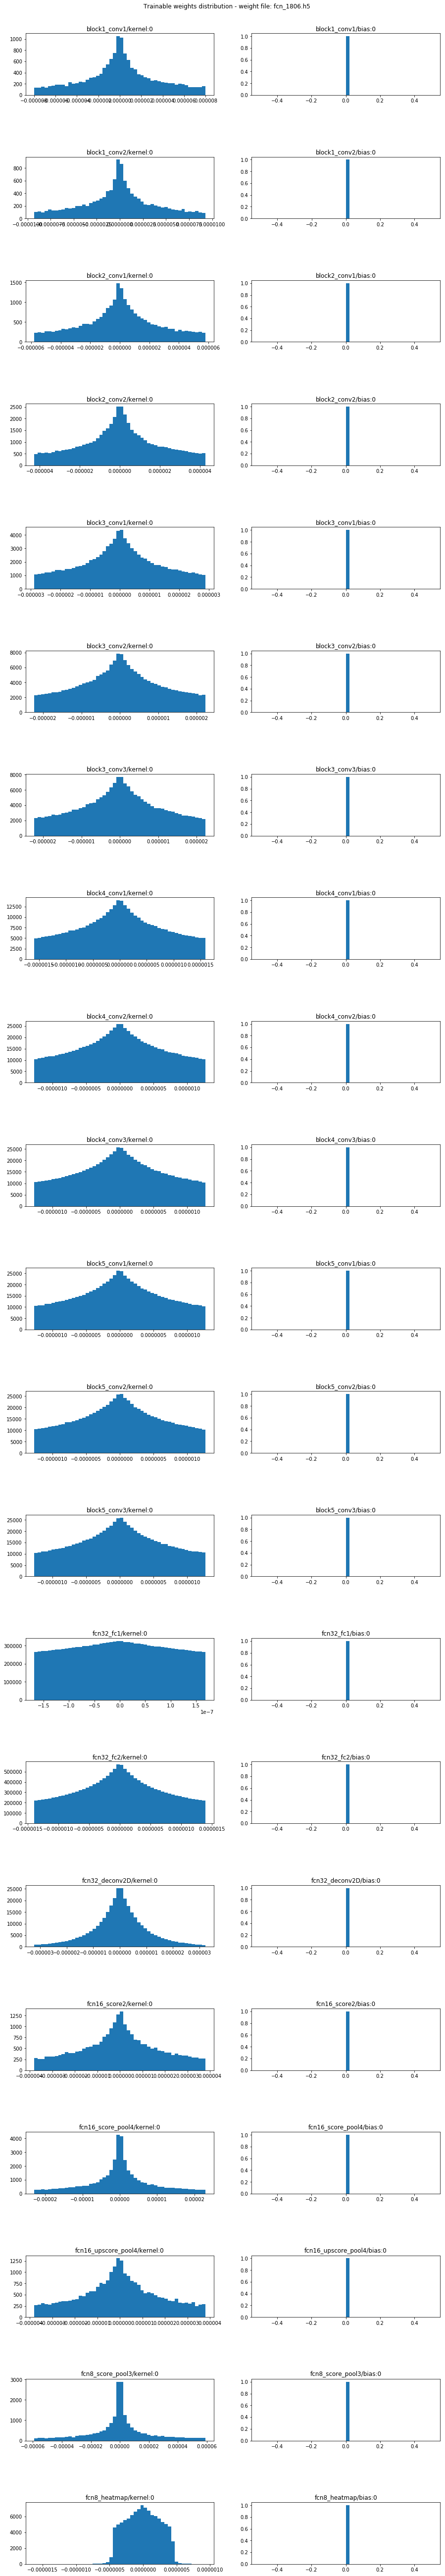

In [40]:
# Pick layer types to display
a = visualize.display_weight_histograms(fcn_model,width=15,height=4, filename = files[FILE_IDX])
weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[FILE_IDX]+'.png')
a.savefig(weights_histogram)

## Load Weights - 2nd weight file

In [9]:
FILE_IDX = 11

weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0940.h5
-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0940.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0940.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0940.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 2nd weights file

In [10]:
# Show stats of all trainable weights    
a = visualize.display_weight_stats(fcn_model)
weights_stats = os.path.join(DIR_WEIGHTS  , 'stats_'+files[FILE_IDX]+'.pdf')
# utils.convertHtmlToPdf(a, weights_stats) 

LAYER,WEIGHT NAME,LAYER TYPE,SHAPE,MIN,MAX,STD
0,block1_conv1/kernel:0,Conv2D,"(3, 3, 7, 64)",-0.1241792589,+0.1135917753,+0.0529531725
0,block1_conv1/bias:0,Conv2D,"(64,)",-0.0243982971,+0.0224305447,+0.0092539852
1,block1_conv2/kernel:0,Conv2D,"(3, 3, 64, 64)",-0.0920403674,+0.0901497975,+0.0377195999
1,block1_conv2/bias:0,Conv2D,"(64,)",-0.0169185828,+0.0120046400,+0.0068737543
2,block2_conv1/kernel:0,Conv2D,"(3, 3, 64, 128)",-0.0769483298,+0.0931993201,+0.0290678963
2,block2_conv1/bias:0,Conv2D,"(128,)",-0.0113019245,+0.0223073009,+0.0060721543
3,block2_conv2/kernel:0,Conv2D,"(3, 3, 128, 128)",-0.0731508210,+0.0739613846,+0.0237059072
3,block2_conv2/bias:0,Conv2D,"(128,)",-0.0209878068,+0.0163584277,+0.0070524290
4,block3_conv1/kernel:0,Conv2D,"(3, 3, 128, 256)",-0.0680572391,+0.0772938132,+0.0196316447
4,block3_conv1/bias:0,Conv2D,"(256,)",-0.0193986781,+0.0295987092,+0.0102481712


### Histograms of Weights - 2nd weights file

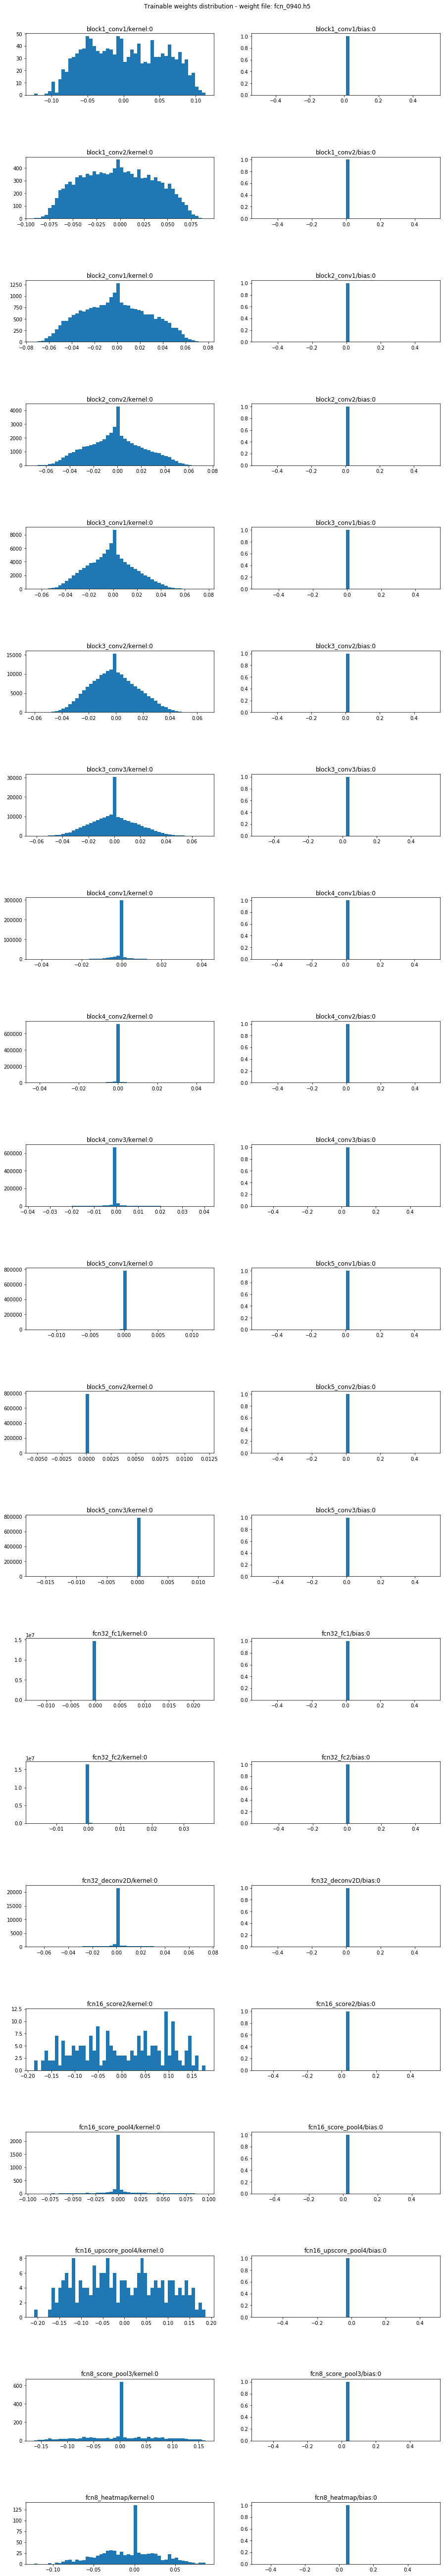

In [11]:
# Pick layer types to display
a = visualize.display_weight_histograms(fcn_model,width=15,height=4, filename = files[FILE_IDX])
weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[FILE_IDX]+'.png')
a.savefig(weights_histogram)

## Load Weights - 3rd weight file

### load

In [24]:
FILE_IDX = 18

weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_2084.h5
-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_2084.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_2084.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_2084.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 3rd weight file

LAYER,WEIGHT NAME,LAYER TYPE,SHAPE,MIN,MAX,STD
0,block1_conv1/kernel:0,Conv2D,"(3, 3, 7, 64)",-0.1473224759,+0.1126275361,+0.0516578145
0,block1_conv1/bias:0,Conv2D,"(64,)",-0.0337608829,+0.0265375767,+0.0110930959
1,block1_conv2/kernel:0,Conv2D,"(3, 3, 64, 64)",-0.1009261459,+0.0940942392,+0.0348355211
1,block1_conv2/bias:0,Conv2D,"(64,)",-0.0234073717,+0.0140981451,+0.0082880203
2,block2_conv1/kernel:0,Conv2D,"(3, 3, 64, 128)",-0.0855003595,+0.0984097794,+0.0260384213
2,block2_conv1/bias:0,Conv2D,"(128,)",-0.0159109719,+0.0254157670,+0.0081888745
3,block2_conv2/kernel:0,Conv2D,"(3, 3, 128, 128)",-0.0907478854,+0.0825735182,+0.0208001267
3,block2_conv2/bias:0,Conv2D,"(128,)",-0.0320140496,+0.0303125642,+0.0119048106
4,block3_conv1/kernel:0,Conv2D,"(3, 3, 128, 256)",-0.0814905241,+0.0830737352,+0.0174563173
4,block3_conv1/bias:0,Conv2D,"(256,)",-0.0428492688,+0.0351830497,+0.0134552326


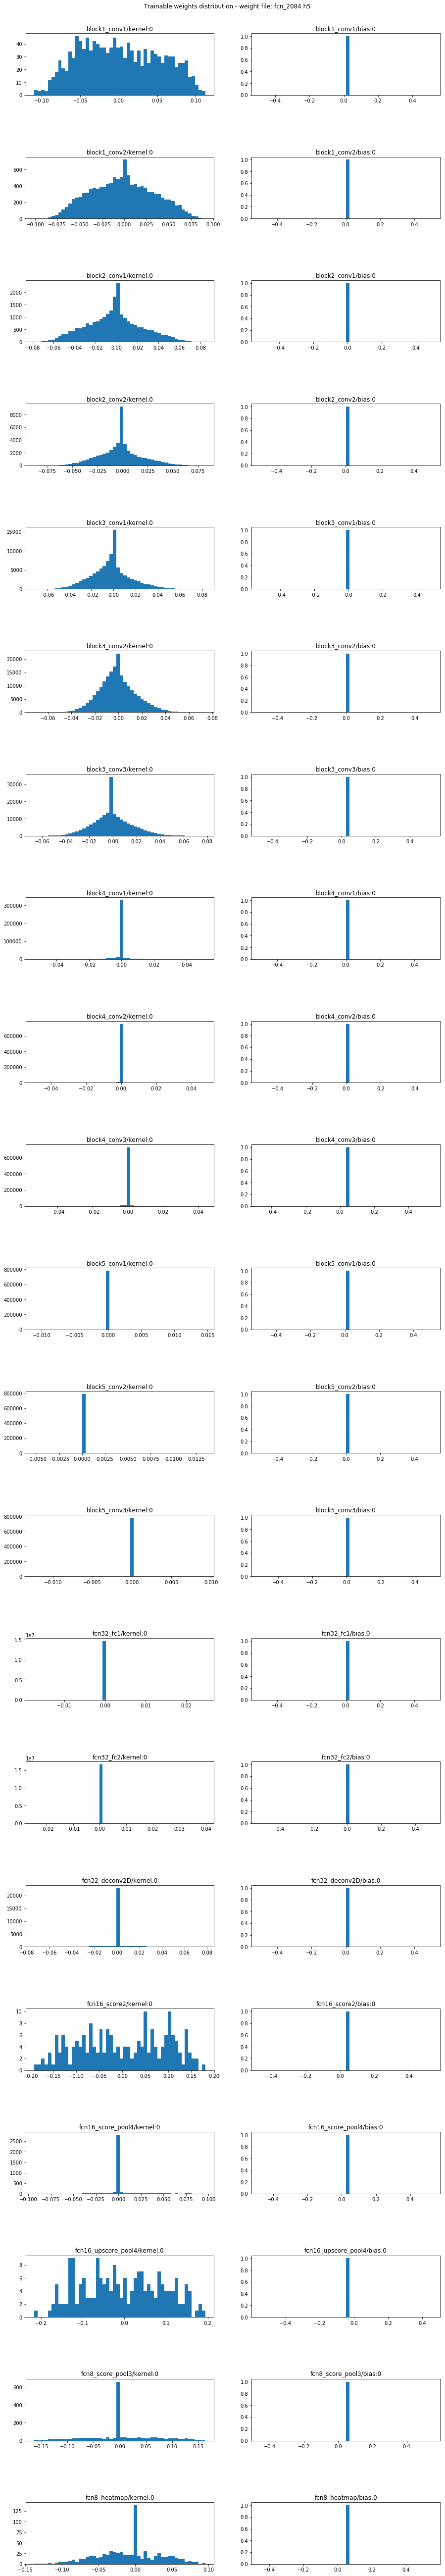

In [25]:
# Show stats of all trainable weights    
a = visualize.display_weight_stats(fcn_model)
weights_stats = os.path.join(DIR_WEIGHTS  , 'stats_'+files[FILE_IDX]+'.pdf')
# utils.convertHtmlToPdf(a, weights_stats) 
# Pick layer types to display
a = visualize.display_weight_histograms(fcn_model,width=15,height=4, filename = files[FILE_IDX])
weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[FILE_IDX]+'.png')
a.savefig(weights_histogram)

### Histograms of Weights - 3rd weight file

In [13]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[2])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[2]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 4rd weight file

In [20]:
weights_path = os.path.join(DIR_WEIGHTS  , files[3])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path) 

Loading weights  F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0022.h5
-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0022.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0022.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0022.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 4th weight file

In [25]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights

In [14]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[3])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[3]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 5th weight file

In [23]:
print(len(files))
weights_path = os.path.join(DIR_WEIGHTS  , files[4])
fcn_model.load_model_weights(weights_path) 

7
-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0033.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0033.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0033.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 5th weight file

In [26]:
# Show stats of all trainable weights    
# visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 5th weight file

In [15]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[4])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[4]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 6th weight file

In [26]:
weights_path = os.path.join(DIR_WEIGHTS  , files[5])
fcn_model.load_model_weights(weights_path) 

-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0041.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0041.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0041.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 6th weight file

In [27]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 6th weight file

In [16]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[5])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[5]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 7th weight file

In [29]:
weights_path = os.path.join(DIR_WEIGHTS  , files[6])
fcn_model.load_model_weights(weights_path) 

-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0056.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0056.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0056.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 7th weight file

In [28]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 7th weight file

In [17]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[6])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[6]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 8th weight file

In [33]:
weights_path = os.path.join(DIR_WEIGHTS  , files[7])
fcn_model.load_model_weights(weights_path) 

-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0063.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0063.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0063.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 8th weight file

In [29]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 8th weight file

In [18]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[7])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[7]+'.png')
# a.savefig(weights_histogram)

## Load Weights - 9th weight file

In [36]:
weights_path = os.path.join(DIR_WEIGHTS  , files[8])
fcn_model.load_model_weights(weights_path) 

-----------------------------------------------
 Load Model with init parm: [ F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0081.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0081.h5
    Weights file loaded: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T1746\fcn_0081.h5 
FCN  MODEL Load weight file COMPLETE 


### Review Weight Stats - 9th weight file

In [30]:
# Show stats of all trainable weights    
# _ = visualize.display_weight_stats(fcn_model)

### Histograms of Weights - 9th weight file

In [19]:
# a = visualize.display_weight_histograms(fcn_model, filename = files[8])
# weights_histogram = os.path.join(DIR_WEIGHTS  , 'histogram_'+files[8]+'.png')
# a.savefig(weights_histogram)